# B09705039_劉惟恩_HW03

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Problem 1

### 1.1

In [3]:
# Read data
f = open('ds/namesex_data_v2.csv', 'r', encoding='utf8')
mydata = csv.DictReader(f)
sexlist = []
namelist = []
foldlist = []
for i, arow in enumerate(mydata):
    if i < 10:
        print(arow)
    sexlist.append(int(arow['sex'].strip()))
    gname = arow['gname'].strip()
    namelist.append(gname)
    foldlist.append(int(arow['fold'].strip()))

sexlist = np.asarray(sexlist)
namelist = np.asarray(namelist)
foldlist = np.asarray(foldlist)
f.close()

nobs = namelist.shape[0]
import pandas as pd
name_df = pd.DataFrame({'sex': sexlist, 'name': namelist, 'fold': foldlist})

{'gname': '承憲', 'sex': '1', 'fold': '9'}
{'gname': '均平', 'sex': '1', 'fold': '7'}
{'gname': '思安', 'sex': '0', 'fold': '6'}
{'gname': '佑誠', 'sex': '1', 'fold': '3'}
{'gname': '乃馨', 'sex': '0', 'fold': '0'}
{'gname': '婕', 'sex': '0', 'fold': '0'}
{'gname': '冠瑜', 'sex': '0', 'fold': '1'}
{'gname': '冠學', 'sex': '1', 'fold': '0'}
{'gname': '立翰', 'sex': '1', 'fold': '2'}
{'gname': '以柔', 'sex': '0', 'fold': '6'}


In [4]:
# split the first and second word of every name
first_word = []
second_word = []
for i in name_df["name"]:
    first_word.append(i[0])
    try:
        second_word.append(i[1])
    except IndexError:
        second_word.append(np.NaN)
name_df["first_word"] = first_word
name_df["second_word"] = second_word

In [5]:
# extract first_word, second_word to 
a = []
for i in name_df["first_word"]:
    if i not in a:
        a.append(i)
        
for i in name_df["second_word"]:
    if i not in a:
        a.append(i)

In [6]:
# get column name
train = name_df[name_df['fold'] <= 6]
freq_dict = {}

for i in train["first_word"]:
    if i not in freq_dict:
        freq_dict[i] = 1
    else:
        freq_dict[i] += 1
        
for i in train["second_word"]:
    if i not in freq_dict:
        freq_dict[i] = 1
    else:
        freq_dict[i] += 1
        
for i in train["name"]:
    if i not in freq_dict:
        freq_dict[i] = 1
    else:
        freq_dict[i] += 1
        
freq_dict = {key:val for key, val in freq_dict.items() if val >= 2}
one_hot_column_name = list(freq_dict.keys())

In [7]:
# get one_hot encoding
one_hot_column_name.remove(np.NaN)
one_hot_column_name.append("_Other_Feature_")
one_hot_code = np.zeros((len(one_hot_column_name), nobs))
all_char = np.array([np.array(name_df["first_word"]), np.array(name_df["second_word"])])
for i in range(nobs):
    
    if all_char[0][i] not in one_hot_column_name:
        one_hot_code[len(one_hot_column_name) - 1][i] = 1
    if all_char[1][i] not in one_hot_column_name:
        one_hot_code[len(one_hot_column_name) - 1][i] = 1
    if name_df["name"][i] not in one_hot_column_name:
        one_hot_code[len(one_hot_column_name) - 1][i] = 1
        
    for j in range(len(one_hot_column_name)):
        if all_char[0][i] == one_hot_column_name[j]:
            one_hot_code[j][i] = 1
        if all_char[1][i] == one_hot_column_name[j]:
            one_hot_code[j][i] = 1
        if name_df["name"][i] == one_hot_column_name[j]:
            one_hot_code[j][i] = 1

In [8]:
# change result to dataframe
data = dict(zip(one_hot_column_name, [list(i) for i in zip(*one_hot_code.T)]))
one_hot_df = pd.DataFrame(data)

name_df = pd.concat([name_df, one_hot_df], axis=1)
name_df = name_df.drop(["first_word", "second_word"], axis=1)

In [9]:
# split dataset
test = name_df[name_df['fold'] == 9]
stack = name_df[name_df['fold'] == 8]
valid = name_df[name_df['fold'] == 7]
train = name_df[name_df['fold'] <= 6]

y_train = np.array(train["sex"])
x_train = np.array(train.drop(['sex', 'name', 'fold'], axis=1))
print("y_train shape:", y_train.shape)
print("x_train shape:", x_train.shape)

y_valid = np.array(valid["sex"])
x_valid = np.array(valid.drop(['sex', 'name', 'fold'], axis=1))
print("y_valid shape:", y_valid.shape)
print("x_valid shape:", x_valid.shape)

y_stack = np.array(stack["sex"])
x_stack = np.array(stack.drop(['sex', 'name', 'fold'], axis=1))
print("y_stack shape:", y_stack.shape)
print("x_stack shape:", x_stack.shape)

y_test = np.array(test["sex"])
x_test = np.array(test.drop(['sex', 'name', 'fold'], axis=1))
print("y_test shape:", y_test.shape)
print("x_test shape:", x_test.shape)

y_train shape: (7483,)
x_train shape: (7483, 1646)
y_valid shape: (1110,)
x_valid shape: (1110, 1646)
y_stack shape: (1073,)
x_stack shape: (1073, 1646)
y_test shape: (1064,)
x_test shape: (1064, 1646)


### 1.2

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# find best C with training and validation data
bestC = 0
F1_score_best = 0
num = 0
for i in np.geomspace(0.0001, 1000, num=20):
    num += 1
    logreg = LogisticRegression(C = i, solver = 'newton-cg')
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_valid)
    f1_score_temp = metrics.f1_score(y_valid, y_pred)
    print("model", num, ":c = ", i ,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        bestC = i
        F1_score_best = f1_score_temp
print("\nbestC =", bestC, ", F-1 Score = ", F1_score_best)

model 1 :c =  0.0001 F1-score: 0.0 
model 2 :c =  0.00023357214690901214 F1-score: 0.0 
model 3 :c =  0.000545559478116852 F1-score: 0.007532956685499058 
model 4 :c =  0.0012742749857031334 F1-score: 0.3493044822256569 
model 5 :c =  0.002976351441631319 F1-score: 0.7388392857142857 
model 6 :c =  0.0069519279617756054 F1-score: 0.8461538461538461 
model 7 :c =  0.01623776739188721 F1-score: 0.8687440982058546 
model 8 :c =  0.0379269019073225 F1-score: 0.8859813084112148 
model 9 :c =  0.08858667904100823 F1-score: 0.8930581613508444 
model 10 :c =  0.2069138081114788 F1-score: 0.8947368421052632 
model 11 :c =  0.4832930238571752 F1-score: 0.896421845574388 
model 12 :c =  1.1288378916846884 F1-score: 0.896421845574388 
model 13 :c =  2.6366508987303554 F1-score: 0.8972667295004714 
model 14 :c =  6.1584821106602545 F1-score: 0.8937381404174572 
model 15 :c =  14.38449888287663 F1-score: 0.8979206049149339 
model 16 :c =  33.59818286283781 F1-score: 0.8972667295004714 
model 17 :c =

In [11]:
# get final train data
final_train = name_df[name_df['fold'] <= 7]

final_y_train = final_train["sex"]
final_x_train = final_train.drop(['sex', 'name', 'fold'], axis=1)

# fit best model
logreg = LogisticRegression(C = bestC, solver = 'newton-cg')
logreg.fit(final_x_train, final_y_train)
y_pred = logreg.predict(x_test)

In [12]:
# testing data Accuracy, Precision, Recall, F-1 Score
final_f1_score = metrics.f1_score(y_test, y_pred)
final_accuracy = metrics.accuracy_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", final_f1_score)
print("Accuracy:", final_accuracy)
print("Recall:", Recall)
print("Precision", Precision)

F-1 Score: 0.8772635814889336
Accuracy: 0.8853383458646616
Recall: 0.8952772073921971
Precision 0.8599605522682445


In [13]:
# get top 20
data = {"feature_name": final_x_train.columns,
       "coef": logreg.coef_.flatten()}
coef_result = pd.DataFrame(data)
coef_result["abs_coef"] = abs(logreg.coef_.flatten())
coef_result.sort_values(by=['abs_coef'], inplace = True, ascending = False)

In [14]:
coef_result.head(20)

,feature_name,coef,abs_coef
341,傑,9.310571,9.310571
447,森,8.745730,8.745730
715,玲,-8.590430,8.590430
575,雯,-8.433518,8.433518
675,凌,-8.407279,8.407279
202,婷,-8.362918,8.362918
380,美,-8.259460,8.259460
793,鋒,8.259152,8.259152
217,萱,-8.249961,8.249961
315,薇,-8.171919,8.171919


The F-1 Score of this model is 0.8772635814889336, accuracy is 0.8853383458646616. According to the top 20 features we can see that feature names of positive coefficients have a high tendency that its sex is male, and negative coefficients have a high tendency that its sex is female. The important features are all reasonable in real world situations.

### 1.3

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# find best n_estimators with training and validation data
best_n_estimators = 0
F1_score_best = 0
num = 0
for i in np.geomspace(5, 1000, num=10).astype(int):
    num += 1
    clf = RandomForestClassifier(n_estimators = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_valid)
    f1_score_temp = metrics.f1_score(y_valid, y_pred)
    print("model", num, ":n_estimators = ", i ,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        best_n_estimators = i
        F1_score_best = f1_score_temp
print("\nbest_n_estimators =", best_n_estimators, ", F-1 Score = ", F1_score_best)

model 1 :n_estimators =  5 F1-score: 0.8614514608859567 
model 2 :n_estimators =  9 F1-score: 0.8637236084452975 
model 3 :n_estimators =  16 F1-score: 0.8648130393096837 
model 4 :n_estimators =  29 F1-score: 0.8665377176015474 
model 5 :n_estimators =  52 F1-score: 0.8704061895551257 
model 6 :n_estimators =  94 F1-score: 0.8754789272030651 
model 7 :n_estimators =  170 F1-score: 0.8683957732949087 
model 8 :n_estimators =  308 F1-score: 0.8683957732949087 
model 9 :n_estimators =  555 F1-score: 0.8683957732949087 
model 10 :n_estimators =  1000 F1-score: 0.8693126815101646 

best_n_estimators = 94 , F-1 Score =  0.8754789272030651


In [16]:
# get final train data
final_train = name_df[name_df['fold'] <= 7]

final_y_train = final_train["sex"]
final_x_train = final_train.drop(['sex', 'name', 'fold'], axis=1)

# fit best model
clf = RandomForestClassifier(n_estimators = best_n_estimators)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

In [17]:
# testing data Accuracy, Precision, Recall, F-1 Score
final_f1_score = metrics.f1_score(y_test, y_pred)
final_accuracy = metrics.accuracy_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", final_f1_score)
print("Accuracy:", final_accuracy)
print("Recall:", Recall)
print("Precision", Precision)

F-1 Score: 0.8404040404040404
Accuracy: 0.8515037593984962
Recall: 0.8542094455852156
Precision 0.827037773359841


In [18]:
# get top 20
data = {"feature_name": final_x_train.columns,
       "feature_importance": clf.feature_importances_.flatten()}
coef_result = pd.DataFrame(data)
coef_result.sort_values(by=['feature_importance'], inplace = True, ascending = False)

In [19]:
coef_result.head(20)

,feature_name,feature_importance
139,妤,0.019104
109,翔,0.015233
217,萱,0.014437
38,柏,0.013269
202,婷,0.012520
19,怡,0.009423
53,承,0.009238
392,蓁,0.009125
95,雅,0.009015
152,哲,0.008694


The F-1 Score of this model is 0.8409321175278621, accuracy is 0.8524436090225563. According to the top 20 features we can see that feature names are all reasonable in real world situations. However, we can't notice which direction it leads to. This is the worst result among all.

### 1.4

model 1 :lr =  0.1 , best_nstg: 1036 F1-score: 0.9070631970260223 
model 2 :lr =  0.5 , best_nstg: 213 F1-score: 0.9060465116279071 
model 3 :lr =  1 , best_nstg: 217 F1-score: 0.9008498583569406 


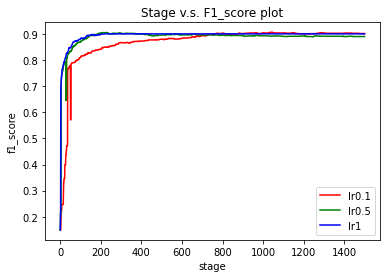


best_lr = 0.1 , best_nstg = 1036 , F-1 Score =  0.9070631970260223


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import random

# find best lr, nstg with training and validation data
best_lr = 0
best_nstg = 0
F1_score_best = 0
num = 0
color = ["red", "green", "blue"]
for i in [0.1, 0.5, 1]:
    num += 1
    clf = GradientBoostingClassifier(n_estimators = 1500, learning_rate = i)
    clf.fit(x_train, y_train)
    f1_score_temp  = 0
    nstg = 0
    all_f1_score = []
    all_stage_num = []
    for stage, pred in enumerate(clf.staged_predict(x_valid)):
        f1_score_in = metrics.f1_score(y_valid, pred)
        all_f1_score.append(f1_score_in)
        all_stage_num.append(stage)
        if f1_score_temp < f1_score_in:
            f1_score_temp = f1_score_in
            nstg = stage
    
    rgb = [[random.random(), random.random(), random.random()]]
    plt.plot(all_stage_num, all_f1_score, color=color[num - 1], label="lr" + str(i))
    plt.xlabel('stage') # 設定 x 軸標題內容及大小
    plt.ylabel('f1_score') # 設定 y 軸標題內容及大小
    plt.title('Stage v.s. F1_score plot') # 設定圖表標題內容及大小
    
    print("model", num, ":lr = ", i, ", best_nstg:", nstg,"F1-score:", f1_score_temp, "")
    if f1_score_temp > F1_score_best:
        best_lr = i
        best_nstg = nstg
        F1_score_best = f1_score_temp
        
plt.legend()
plt.show()
print("\nbest_lr =", best_lr, ", best_nstg =", best_nstg, ", F-1 Score = ", F1_score_best)

In [21]:
# get final train data
final_train = name_df[name_df['fold'] <= 7]

final_y_train = final_train["sex"]
final_x_train = final_train.drop(['sex', 'name', 'fold'], axis=1)

# fit best model
clf = GradientBoostingClassifier(n_estimators = best_nstg, learning_rate = best_lr)
clf.fit(final_x_train, final_y_train)
y_pred = clf.predict(x_test)

In [22]:
# testing data Accuracy, Precision, Recall, F-1 Score
final_f1_score = metrics.f1_score(y_test, y_pred)
final_accuracy = metrics.accuracy_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", final_f1_score)
print("Accuracy:", final_accuracy)
print("Recall:", Recall)
print("Precision", Precision)

F-1 Score: 0.861900097943193
Accuracy: 0.8674812030075187
Recall: 0.9034907597535934
Precision 0.8239700374531835


In [23]:
# get top 20
data = {"feature_name": final_x_train.columns,
       "feature_importance": clf.feature_importances_.flatten()}
coef_result = pd.DataFrame(data)
coef_result.sort_values(by=['feature_importance'], inplace = True, ascending = False)

In [24]:
coef_result.head(20)

,feature_name,feature_importance
139,妤,0.030090
109,翔,0.022839
217,萱,0.020303
38,柏,0.019838
202,婷,0.018985
152,哲,0.012866
19,怡,0.012856
53,承,0.012841
392,蓁,0.012775
95,雅,0.012068


The F-1 Score of this model is 0.8681863230921704, accuracy is 0.875. According to the top 20 features we can see that feature names are all reasonable in real world situations. However, we can't notice which direction it leads to. This is the second best result among all.

### 1.5

In [25]:
# level-0 models
# fit best LogisticRegression model
logreg = LogisticRegression(C = bestC, solver = 'newton-cg')
logreg.fit(final_x_train, final_y_train)
y1_pred = logreg.predict_proba(x_stack)
y1_test_pred = logreg.predict_proba(x_test)

# fit best RandomForestClassifier model
clf = RandomForestClassifier(n_estimators = best_n_estimators)
clf.fit(final_x_train, final_y_train)
y2_pred = clf.predict_proba(x_stack)
y2_test_pred = clf.predict_proba(x_test)

# fit best GradientBoostingClassifier model
clf = GradientBoostingClassifier(n_estimators = best_nstg, learning_rate = best_lr)
clf.fit(final_x_train, final_y_train)
y3_pred = clf.predict_proba(x_stack)
y3_test_pred = clf.predict_proba(x_test)

In [26]:
# create dataframe
data = {"lr": y1_pred[:, 1],
       "rfc": y2_pred[:, 1],
       "gbc": y3_pred[:, 1]}
stack_df = pd.DataFrame(data)

data = {"lr": y1_test_pred[:, 1],
       "rfc": y2_test_pred[:, 1],
       "gbc": y3_test_pred[:, 1]}
test_df = pd.DataFrame(data)

In [27]:
display(stack_df)

,lr,rfc,gbc
0,0.000445,0.042553,0.026907
1,0.994353,0.880660,0.688721
2,0.683242,0.716338,0.583860
3,0.784108,0.553483,0.560007
4,0.955879,0.828052,0.738357
...,...,...,...
1068,0.000371,0.095745,0.115257
1069,0.000963,0.007839,0.185677
1070,0.999828,1.000000,0.972972
1071,0.330197,0.322556,0.253803


In [28]:
# level-1 models
# fit best LogisticRegression model
logreg = LogisticRegression(C = bestC, solver = 'newton-cg', penalty = "none")
logreg.fit(stack_df, y_stack)
y_pred = logreg.predict(test_df)

In [29]:
# print ceof
display(logreg.coef_)

array([[ 2.93805133, -0.26652665,  5.42952543]])

The meaning of the coefficient is the best weight of the three level-0 models predict probability of male.

In [30]:
# testing data Accuracy, Precision, Recall, F-1 Score
final_f1_score = metrics.f1_score(y_test, y_pred)
final_accuracy = metrics.accuracy_score(y_test, y_pred)
Recall = metrics.recall_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)

print("F-1 Score:", final_f1_score)
print("Accuracy:", final_accuracy)
print("Recall:", Recall)
print("Precision", Precision)

F-1 Score: 0.88
Accuracy: 0.8872180451127819
Recall: 0.9034907597535934
Precision 0.8576998050682261


## Problem 2

In [31]:
# Proprecessing
stu_adm = pd.read_csv('ds/student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('ds/univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("In raw data, there are %d students and %d departments in total." % (nstuid, ndepid))

#construct the department-student matrix (i.e. array). 
dep_stu = np.zeros((ndepid, nstuid))
rowname = all_depid.copy()

depid_seq_map = dict()
for i in range(ndepid):
    depid_seq_map[all_depid[i]] = i

stuid_seq_map = dict()
for i in range(nstuid):
    stuid_seq_map[all_stuid[i]] = i

for cindex, row in stu_adm.iterrows():
    #print(cindex, row)
    dep_seq = depid_seq_map[row['department_id']]
    stu_seq = stuid_seq_map[row['student_id']]
    #print(dep_seq, stu_seq)
    dep_stu[dep_seq, stu_seq] = 1

#Remove very small departments.
min_stu_per_dep = 10
min_apply_dep_per_stu = 2

#remove small departments and single-application students. 
dep_apply_sum = np.sum(dep_stu, axis = 1)
keeprow = dep_apply_sum >= min_stu_per_dep
rowname = rowname[keeprow]
dep_stu2 = dep_stu[keeprow,:]
stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#another run of filtering
dep_apply_sum = np.sum(dep_stu2, axis = 1)
dep_stu2 = dep_stu2[dep_apply_sum >= min_stu_per_dep,:]
rowname = rowname[dep_apply_sum >= min_stu_per_dep]
stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#third run of filtering
dep_apply_sum = np.sum(dep_stu2, axis = 1)
dep_stu2 = dep_stu2[dep_apply_sum >= min_stu_per_dep,:]
rowname = rowname[dep_apply_sum >= min_stu_per_dep]

stu_apply_sum = np.sum(dep_stu2, axis = 0)
dep_stu2 = dep_stu2[:, stu_apply_sum >= min_apply_dep_per_stu]

#check to make sure the two conditions are satisfied. 
dep_apply_sum = np.sum(dep_stu2, axis = 1)
print("Number of department too small:", np.sum(dep_apply_sum < min_stu_per_dep))
stu_apply_sum = np.sum(dep_stu2, axis = 0)
print("Number of students applying only one department:", np.sum(stu_apply_sum <min_apply_dep_per_stu))

#now both conditions are satisfied.
stu_dep_df = pd.DataFrame(dep_stu2, index = rowname)

In raw data, there are 60461 students and 1976 departments in total.
Number of department too small: 0
Number of students applying only one department: 0


In [32]:
display(stu_dep_df)

,0,1,2,3,4,5,6,7,8,9,...,47376,47377,47378,47379,47380,47381,47382,47383,47384,47385
001012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001022,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001032,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001052,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
150132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
150142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
151012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### 2.1

In [33]:
# get color of dep
color = []
for i in stu_dep_df.index:
    color.append(uname.loc[uname['department_id'] == i, 'category_id'].iloc[0])

original shape:    (1917, 47386)
transformed shape: (1917, 8)


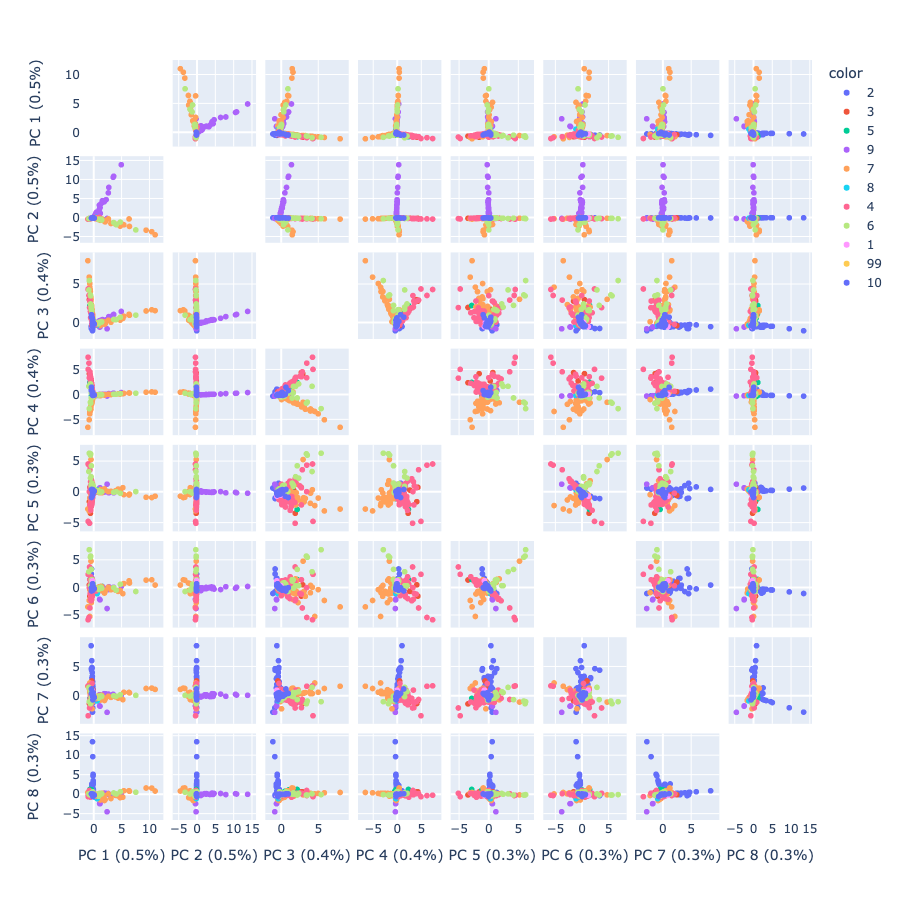

In [34]:
import plotly.express as px
import plotly
from sklearn.decomposition import PCA

# Perform PCA
X = stu_dep_df
pca = PCA(n_components = 8)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

# Visualization
components = X_pca
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(8),
    color=color,
    width=900, height=900
)

fig.update_traces(diagonal_visible=False)
fig.show(renderer="png")

From the results above, we can see that the outer square (PC1, PC2 | PC7, PC8) have clearer two axis shape, which is more preferable in PCA. 

### 2.2

original shape:    (1917, 47386)
transformed shape: (1917, 2)


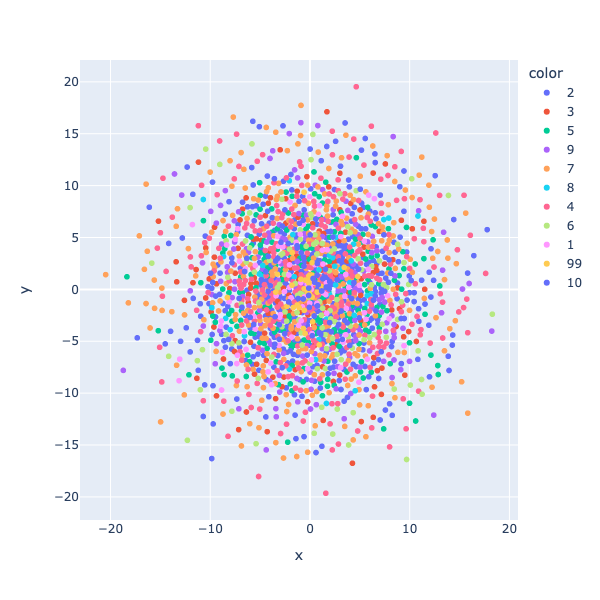

In [35]:
from sklearn.manifold import MDS
import plotly.express as px

# Perform MDS metric
X = stu_dep_df
mds = MDS(metric=True)
X_mds = mds.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_mds.shape)

# Visualization
fig = px.scatter(x=X_mds[:,0], y=X_mds[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
transformed shape: (1917, 2)


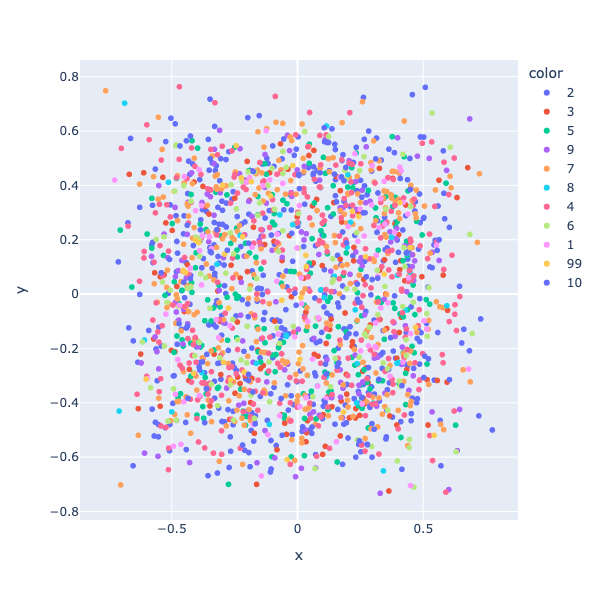

In [36]:
from sklearn.manifold import MDS
import plotly.express as px

# Perform MDS non-metric
X = stu_dep_df
mds = MDS(metric=False)
X_mds = mds.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_mds.shape)

# Visualization
fig = px.scatter(x=X_mds[:,0], y=X_mds[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

The MDS metric collapes in the center and the non-metric one surrounds a circle. It is still hard to visualize the group relations.

### 2.3

original shape:    (1917, 47386)
transformed shape: (1917, 2)


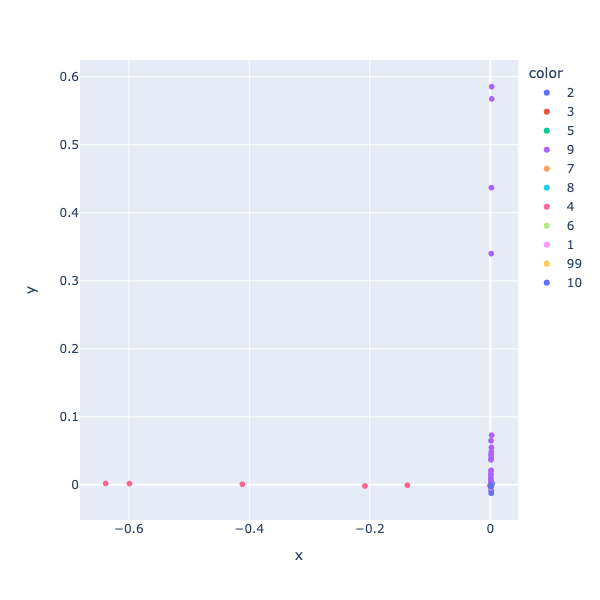

In [37]:
from sklearn.manifold import LocallyLinearEmbedding
import plotly.express as px

# Perform LLE n_neighbors=20
X = stu_dep_df
lle = LocallyLinearEmbedding(n_neighbors=20)
X_lle = lle.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_lle.shape)

# Visualization
fig = px.scatter(x=X_lle[:,0], y=X_lle[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
transformed shape: (1917, 2)


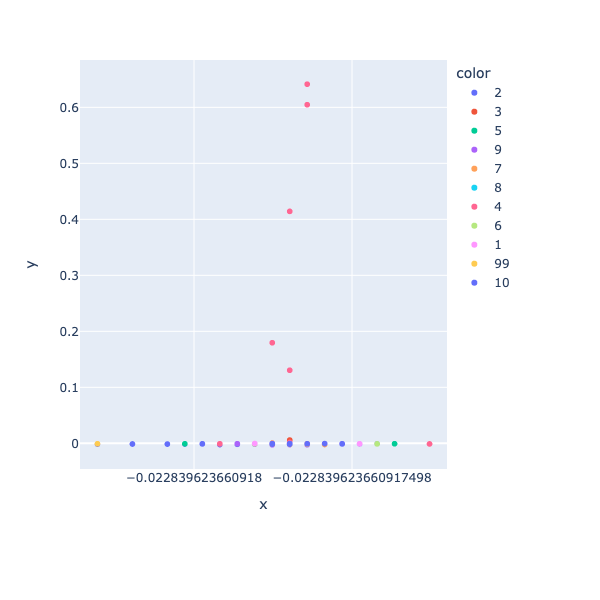

In [38]:
from sklearn.manifold import LocallyLinearEmbedding
import plotly.express as px

# Perform Perform LLE n_neighbors=40
X = stu_dep_df
lle = LocallyLinearEmbedding(n_neighbors=40)
X_lle = lle.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_lle.shape)

# Visualization
fig = px.scatter(x=X_lle[:,0], y=X_lle[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
pca transformed shape: (1917, 100)
lle transformed shape: (1917, 2)


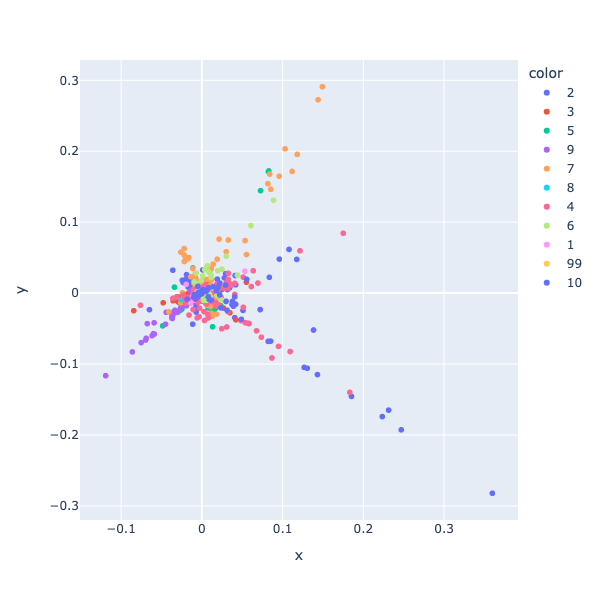

In [39]:
from sklearn.manifold import LocallyLinearEmbedding
import plotly.express as px
from sklearn.decomposition import PCA

# Perform PCA n_components = 100
X = stu_dep_df
pca = PCA(n_components = 100)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("pca transformed shape:", X_pca.shape)

# Perform LLE n_neighbors=20
lle = LocallyLinearEmbedding(n_neighbors=20)
X_lle = lle.fit_transform(X_pca)
print("lle transformed shape:", X_lle.shape)

# Visualization
fig = px.scatter(x=X_lle[:,0], y=X_lle[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

The model by doing PCA first has a much better LLE result while the previous two result are almost useless.

### 2.4

original shape:    (1917, 47386)
transformed shape: (1917, 2)


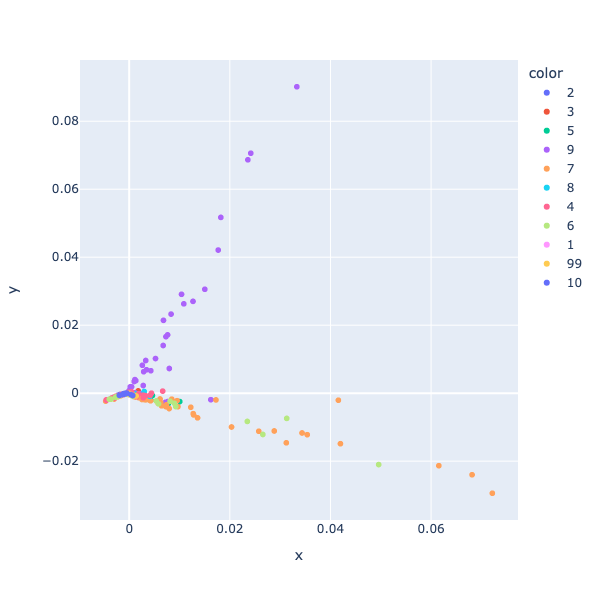

In [40]:
from sklearn.decomposition import KernelPCA
import plotly.express as px

# Perform KernelPCA n_components=2, kernel = 'rbf'
X = stu_dep_df
kpca = KernelPCA(n_components=2, kernel = 'rbf')
X_kpca = kpca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_kpca.shape)

# Visualization
fig = px.scatter(x=X_kpca[:,0], y=X_kpca[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
transformed shape: (1917, 2)


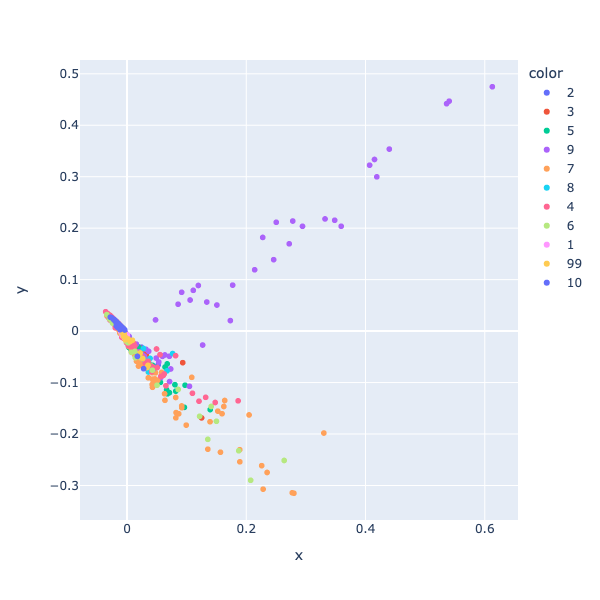

In [41]:
from sklearn.decomposition import KernelPCA
import plotly.express as px

# Perform KernelPCA n_components=2, kernel = 'cosine'
X = stu_dep_df
kpca = KernelPCA(n_components=2, kernel = 'cosine')
X_kpca = kpca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_kpca.shape)

# Visualization
fig = px.scatter(x=X_kpca[:,0], y=X_kpca[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

Both KernelPCA models have some good resultson visualization.

### 2.5

original shape:    (1917, 47386)
transformed shape: (1917, 2)


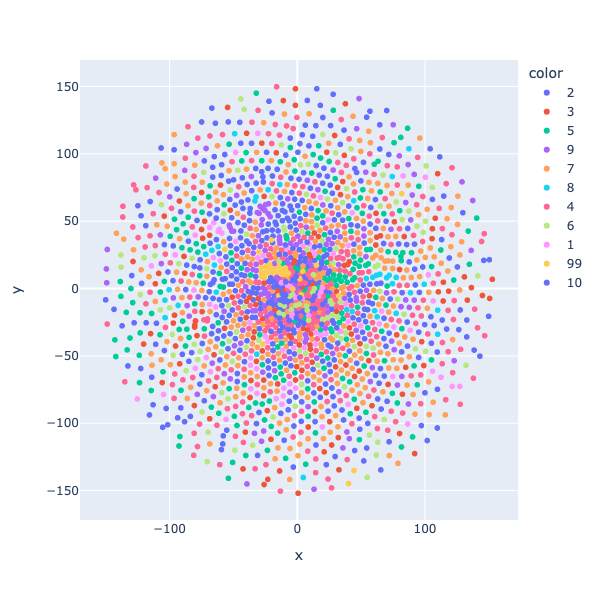

In [42]:
from sklearn.manifold import TSNE
import plotly.express as px

# Perform TSNE metric = 'euclidean'
X = stu_dep_df
tsne = TSNE(metric = 'euclidean')
X_tsne = tsne.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_tsne.shape)

# Visualization
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
transformed shape: (1917, 2)


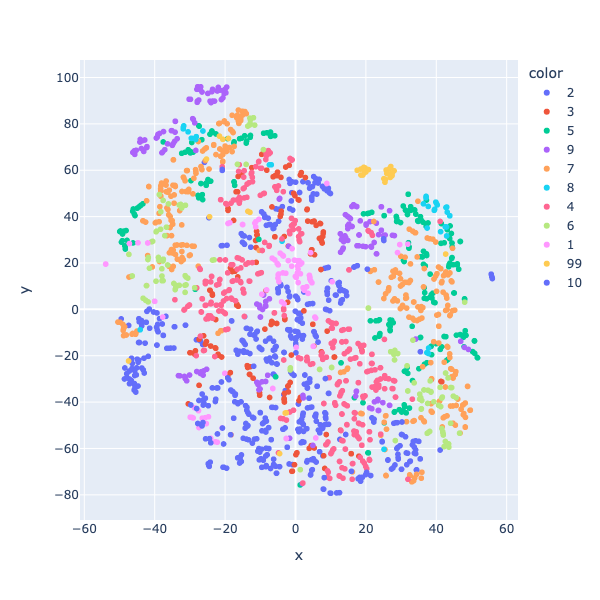

In [43]:
from sklearn.manifold import TSNE
import plotly.express as px

# Perform TSNE metric = 'cosine'
X = stu_dep_df
tsne = TSNE(metric = 'cosine')
X_tsne = tsne.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_tsne.shape)

# Visualization
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

original shape:    (1917, 47386)
transformed shape: (1917, 2)


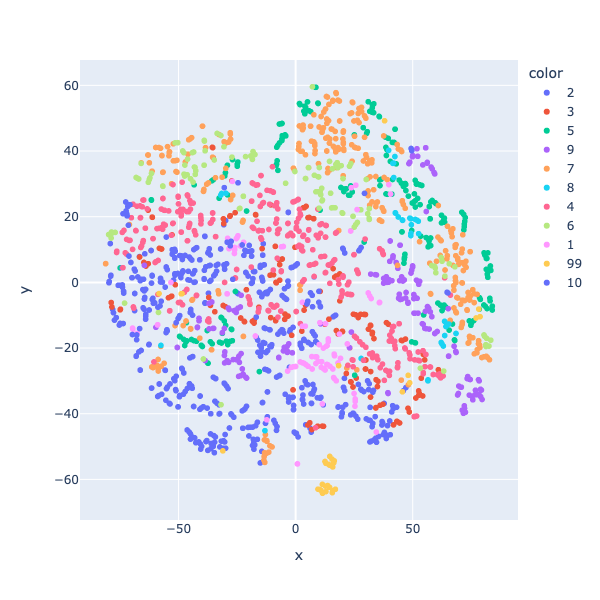

In [44]:
from sklearn.manifold import TSNE
import plotly.express as px

# Perform TSNE metric = 'jaccard'
X = stu_dep_df
tsne = TSNE(metric = 'jaccard')
X_tsne = tsne.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_tsne.shape)

# Visualization
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1], color=color, width=600, height=600)
fig.show(renderer="png")

TSNE with euclidean metric doesn't seperate the data enough. However, TSNE with cosine, jaccard metric have very good visualization results especially jaccard. We can see groups more easily with it.

### 2.6

The most promising visualization method in the previous question is TSNE with jaccard metric. The result will be write to a "fig1.png" file.

In [45]:
# get depname
uname['depname'] = uname.school_name_abbr + uname.department_name_abbr
abr_name = []
for i in stu_dep_df.index:
    abr_name.append(uname.loc[uname['department_id'] == i, 'depname'].iloc[0])
    
# Visualization
fig = px.scatter(x=X_tsne[:,0], y=X_tsne[:,1], text=abr_name, color=color, width=4000, height=4000)
fig.update_layout(
    font=dict(
        size=8,  # Set the font size here
    )
)

# write to file
fig.write_image("fig1.png")